In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

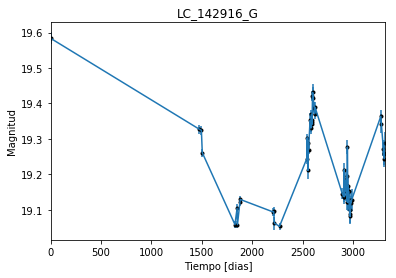

In [2]:
data = np.genfromtxt('LC_142916_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_142916_G')
plt.savefig("LC_142916_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

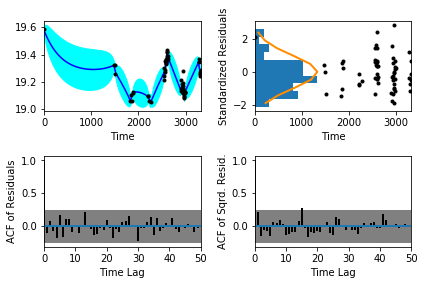

In [5]:
sample.assess_fit()

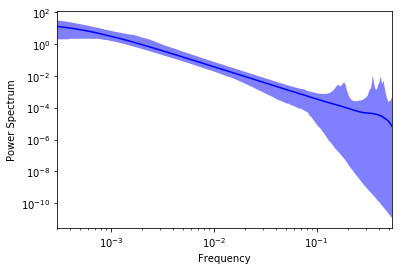

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

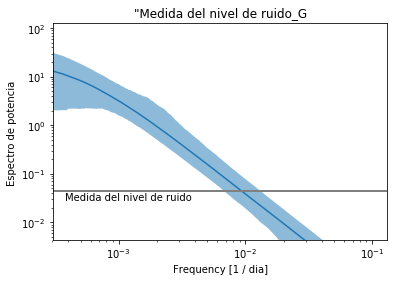

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_142916_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_142916_G')

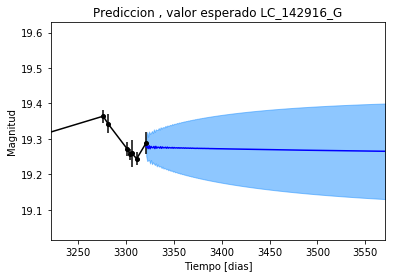

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_142916_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_142916_G')

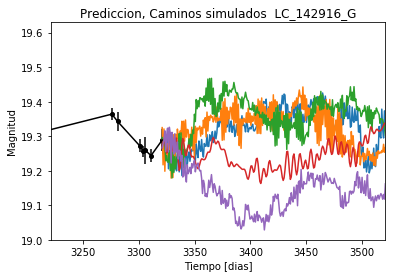

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_142916_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


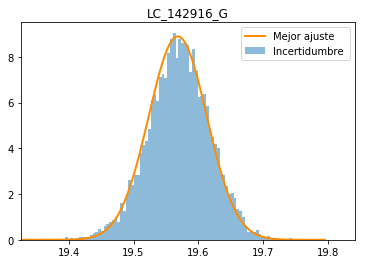

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_142916_G')
plt.savefig("Mejor_ajuste_LC_142916_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_142916_G')

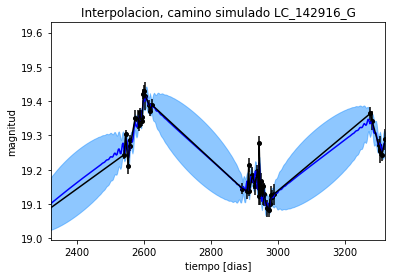

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_142916_G')

Text(0.5,1,'Interpolacion, camino simulado LC_142916_G')

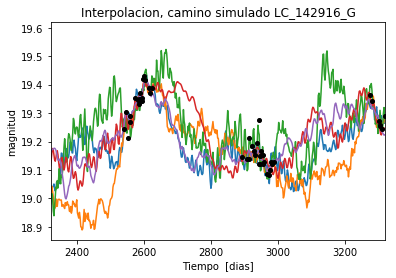

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_142916_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 392.440122489
Median: 0.00941601023187
Standard deviation: 0.13348531607
68% credibility interval: [ 0.00245941  0.03818935]
95% credibility interval: [  4.81572414e-04   5.08150449e-01]
99% credibility interval: [  3.38649544e-04   9.36910378e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 630.484037689
Median: 0.00796271849637
Standard deviation: 0.0611870742875
68% credibility interval: [ 0.0017019   0.02717491]
95% credibility interval: [ 0.00036201  0.1575847 ]
99% credibility interval: [  3.14353774e-04   4.54038332e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 135.71651011
Median: 0.335408216354
Standard de

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 359.173005585
Median: 125.08947746
Standard deviation: 2.48590314417
68% credibility interval: [ 122.28089776  127.24091246]
95% credibility interval: [ 119.09124035  128.21272303]
99% credibility interval: [ 116.43616617  128.79129388]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 379.770741327
Median: 2.37035343343
Standard deviation: 2.55464144666
68% credibility interval: [ 0.64007417  5.38686358]
95% credibility interval: [  0.09300034  10.24256818]
99% credibility interval: [  0.03830053  13.04406668]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 164.229530516
Median: 7.92889241052
Standard deviation: 10.5066984721
68% credibility interval: [  2.56217668  17.33674963]
95% credibility interval: [  0.2680553

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 463.543208791
Median: 2.91318635002e-61
Standard deviation: 8.32699620403e+75
68% credibility interval: [  5.05621916e-119   1.74441522e-016]
95% credibility interval: [  3.08709455e-184   3.05791759e+001]
99% credibility interval: [  3.33540973e-243   1.08335158e+072]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1214.77802746
Median: 19.295190114
Standard deviation: 0.0831013718362
68% credibility interval: [ 19.21983304  19.37868788]
95% credibility interval: [ 19.14189861  19.46745816]
99% credibility interval: [ 19.08570872  19.53863233]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 212.003866794
Median: 0.419579370855
Standard deviation: 0.223137726688
68% credibility interval: [ 0.17575856  0.64710618]
95% credibility interval: [ 0.          0.85870241]
99% credibility interval: [ 0.          1.01858131]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 212.003866794
Median: 0.419579370855
Standard deviation: 0.223137726688
68% credibility interval: [ 0.17575856  0.64710618]
95% credibility interval: [ 0.          0.85870241]
99% credibility interval: [ 0.          1.01858131]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 310.004343098
Median: 0.0
Standard deviation: 0.000340341167879
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 359.173005585
Median: 125.08947746
Standard deviation: 2.48590314417
68% credibility interval: [ 122.28089776  127.24091246]
95% credibility interval: [ 119.09124035  128.21272303]
99% credibility interval: [ 116.43616617  128.79129388]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 507.930614858
Median: 0.027365656821
Standard deviation: 0.0141485265761
68% credibility interval: [ 0.01867845  0.04032193]
95% credibility interval: [ 0.01259157  0.06074705]
99% credibility interval: [ 0.01036687  0.08208024]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 356.327970286
Median: 1.17320857886
Standard deviation: 0.26545126529
68% credibility interval: [ 0.92728996  1.46882509]
95% credibility interval: [ 0.75532656  1.78826717]
99% credibility interval: [ 0.66492493  1.93831538]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 197.343700028
Median: 0.204625378576
Standard deviation: 0.424457189608
68% credibility interval: [ 0.01495557  0.60950861]
95% credibility interval: [  6.03522680e-05   1.48460154e+00]
99% credibility interval: [  5.95514994e-74   2.35526267e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 392.440122489
Median: (-0.0591625371411-1.22717618386j)
Standard deviation: 1.63373420128
68% credibility interval: [-0.23995075-2.6347569j  -0.01545291-4.04001182j]
95% credibility interval: [ -3.19280343e+00+0.j          -3.02580871e-03-2.61291163j]
99% credibility interval: [ -5.88678152e+00+0.j          -2.12779784e-03-0.44319669j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 630.484037689
Median: (-0.0500312358616+2.16196980924j)
Standard deviation: 1.45377081247
68% credibility interval: [-0.17074497+2.21382088j -0.01069337+3.69035919j]
95% credibility interval: [-0.99013389+3.30464998j -0.00227460+0.j        ]
99% credibility interval: [ -2.85280698e+00+5.85116743j  -1.97514301e-03+0.j        ]
Posterior summ